In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt


In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


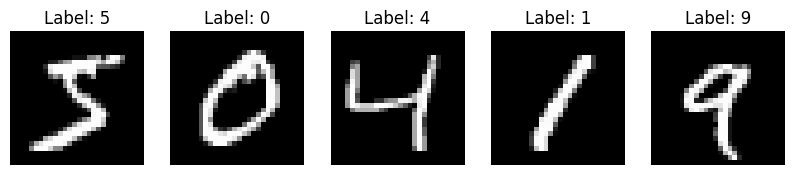

In [19]:
# Display 5 images
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(x_train[i], cmap='gray')  # Use grayscale for better visualization
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis('off')  # Removes the axis ticks if set to off
plt.show()

In [5]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),# randomly turns off 20% of input to zero to prevent overfitting
  tf.keras.layers.Dense(10, activation='softmax')# like hard & Soft voting in Ensemble learning
])

c:\Users\julio\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.compile(optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])

In [9]:
model.fit(x_train, y_train, epochs=6)


Epoch 1/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9792 - loss: 0.0661
Epoch 2/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9819 - loss: 0.0566
Epoch 3/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9840 - loss: 0.0494
Epoch 4/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9845 - loss: 0.0470
Epoch 5/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9857 - loss: 0.0433
Epoch 6/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9871 - loss: 0.0406


In [8]:
test_loss, test_acc = model.evaluate(x_test, y_test)

# Printed results
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step - accuracy: 0.9713 - loss: 0.0893
Test Loss: 0.0768
Test Accuracy: 0.9750


In [10]:
history = model.fit(x_train, y_train, epochs=6)

Epoch 1/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9882 - loss: 0.0369
Epoch 2/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9884 - loss: 0.0331
Epoch 3/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9888 - loss: 0.0316
Epoch 4/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9890 - loss: 0.0303
Epoch 5/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9901 - loss: 0.0305
Epoch 6/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9899 - loss: 0.0277


In [15]:
train_loss = history.history['loss']
train_acc = history.history['accuracy']

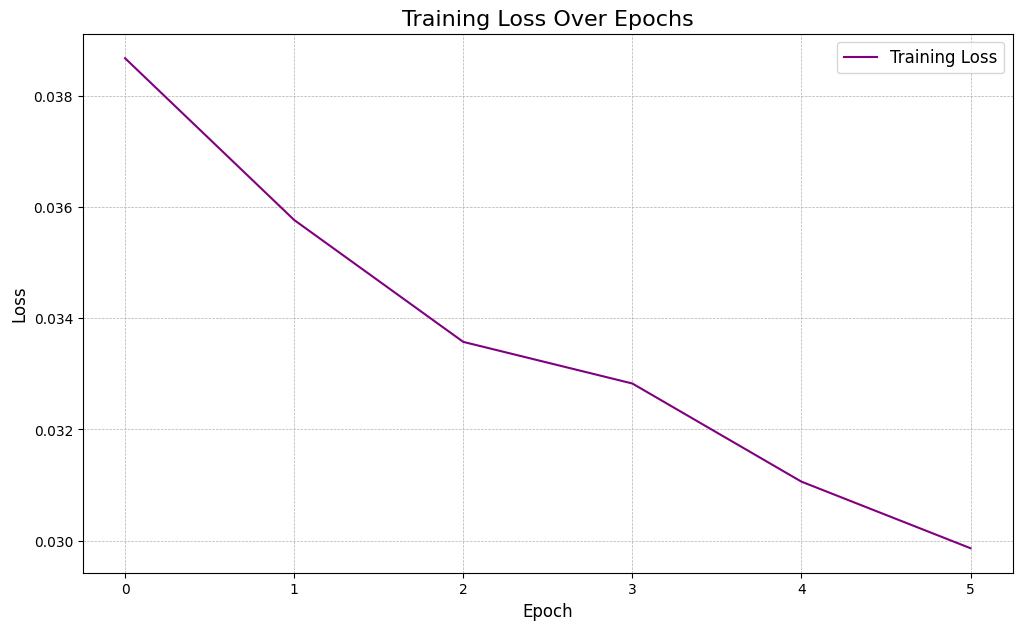

In [17]:
plt.figure(figsize=(12, 7))  
plt.plot(train_loss, color='purple', label='Training Loss')  # Changed color to purple
plt.title('Training Loss Over Epochs', fontsize=16)  
plt.xlabel('Epoch', fontsize=12)  
plt.ylabel('Loss', fontsize=12)  
plt.legend(fontsize=12) 
plt.grid(True, linestyle='--', linewidth=0.5)  # Changed grid style
plt.show()

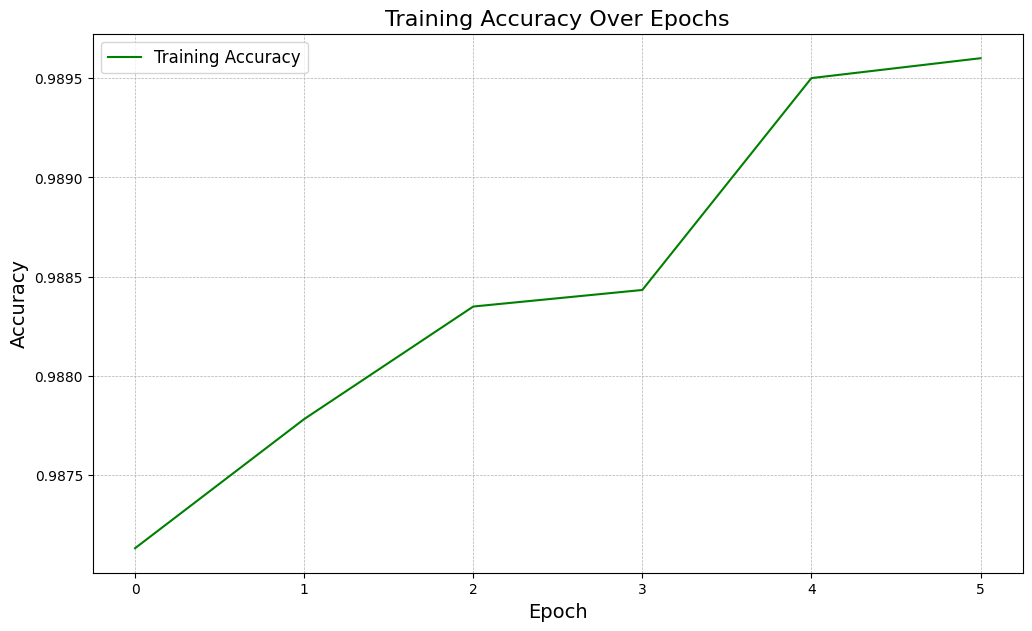

In [18]:
plt.figure(figsize=(12, 7))  
plt.plot(train_acc, color='green', label='Training Accuracy')  # Changed color to green
plt.title('Training Accuracy Over Epochs', fontsize=16)  
plt.xlabel('Epoch', fontsize=12)  
plt.ylabel('Accuracy', fontsize=12)  
plt.legend(fontsize=12)  
plt.grid(True, linestyle='--', linewidth=0.5)  # Changed grid style
plt.show()